In [1]:
import pandas as pd
titanic_df = pd.read_csv("titanic_data.csv")

In [2]:
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard

# 一 查看数据的整体情况

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#查看泰坦尼克整体信息
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# 查看表格中缺少的信息
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#处理缺失数据，仅对Age进行了缺失数据的处理
titanic_df.dropna(subset = ['Age'], inplace = True)

Survived
0    424
1    290
Name: Survived, dtype: int64


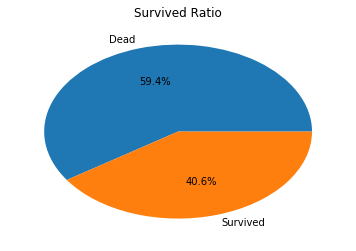

In [7]:
#查看坦泰尼整体的存活情况
total_survied=titanic_df.groupby('Survived')['Survived'].count()
print(total_survied)
plt.pie(total_survied, labels=['Dead', 'Survived'], autopct='%.1f%%')
plt.title('Survived Ratio')
plt.show()

整艘船的生还比例是0.383.

#  二 查看幸存者的特征

## 性别

Sex
female    261
male      453
Name: Sex, dtype: int64


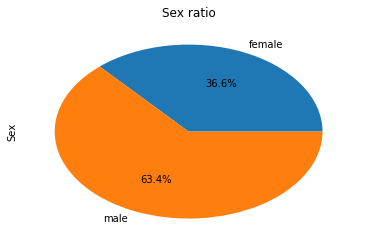

In [8]:
#查看乘客的男女比列
grouped_sex = titanic_df.groupby('Sex')['Sex'].count()
print(grouped_sex)
grouped_sex.plot(kind='pie', autopct='%.1f%%' )
plt.title('Sex ratio')
plt.show()

In [9]:
#定义计算survied rate的函数
def survied_information(feature):
    grouped_data = titanic_df.groupby([feature, 'Survived'])['Survived'].count().unstack().rename(index=str, columns={0: 'num_Dead', 1: 'num_Survived'})
    grouped_data['Survival rate'] = grouped_data['num_Survived']/(grouped_data['num_Dead']+ grouped_data['num_Survived'])
    return grouped_data


In [10]:
def pie_graph(feature):
    data = grouped_data = titanic_df.groupby([feature, 'Survived'])['Survived'].count().unstack().rename(index=str, columns={0: 'num_Dead', 1: 'num_Survived'})
    data_Survived = grouped_data['num_Survived'].plot(kind='pie', autopct='%.1f%%' )
    plt.title(feature + ' '+'Vs Survival rate')
    plt.show()


In [11]:
# 各种因素对幸存比例的影响分析的柱状图
def bar_graph(feature):
    titanic_df.groupby([feature, 'Survived'])['Survived'].count().unstack().rename(index=str, columns={0: "dead", 1: "survived"}).plot(kind="bar", stacked=True)
    #加上y轴和图标的标题
    plt.ylabel('Namber of passengers')
    plt.title(feature + 'VS Survival Vs Count')
    plt.show()

In [12]:
survied_information('Sex')

Survived,num_Dead,num_Survived,Survival rate
Sex,,,
female,64,197,0.754789
male,360,93,0.205298


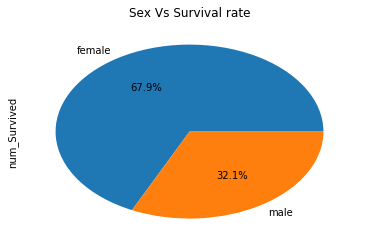

In [13]:
pie_graph('Sex')

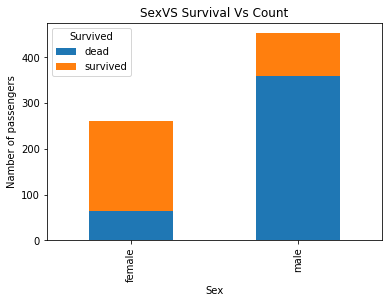

In [14]:
bar_graph('Sex')

生还的女性乘客有223名，占女性乘客的0.74，占生还总人数0.68.
生还的男性乘客有109名，占男性乘客的0.18，占生还总人数0.318.

## 乘客的仓位等级

In [15]:
survied_information('Pclass')

Survived,num_Dead,num_Survived,Survival rate
Pclass,,,
1,64,122,0.655914
2,90,83,0.479769
3,270,85,0.239437


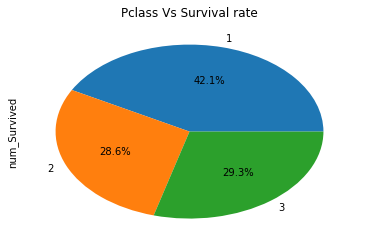

In [16]:
pie_graph('Pclass')

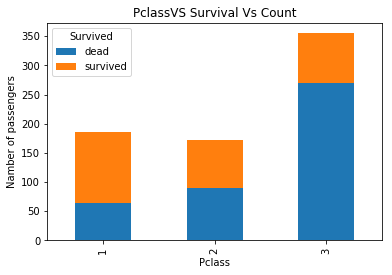

In [17]:
bar_graph('Pclass')

## 登陆的港口

In [18]:
survied_information('Embarked')

Survived,num_Dead,num_Survived,Survival rate
Embarked,,,
C,51,79,0.607692
Q,20,8,0.285714
S,353,201,0.362816


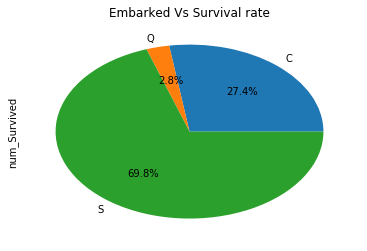

In [19]:
pie_graph('Embarked')

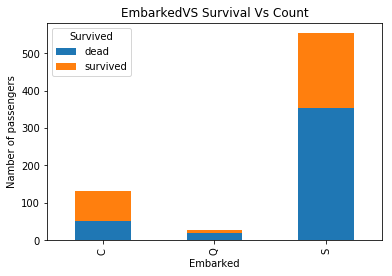

In [20]:
bar_graph('Embarked')

## 年龄

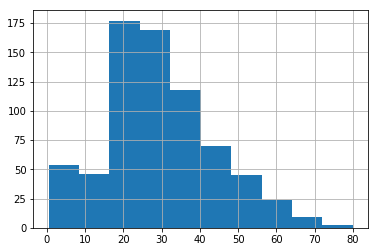

In [21]:
titanic_df['Age'].hist()
plt.show()

In [22]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
# 按照导师的做法改的年龄的分组
bins = [0,18,50,99]
titanic_df['Age_group'] = pd.cut(titanic_df['Age'],\
                bins, labels = ['child', 'middle', 'old'])


In [24]:
#  自己写的年龄分组的函数
#def get_age_group(age):
#    if age < 18:
#        return 'child'
#    elif age < 50:
#        return 'middle'
#   else:
#        return 'old'
#titanic_df['Age_group'] = titanic_df['Age'].dropna().apply(get_age_group)
#titanic_df.head()


In [25]:
survied_information('Age_group')

Survived,num_Dead,num_Survived,Survival rate
Age_group,,,
child,69,70,0.503597
middle,313,198,0.387476
old,42,22,0.343750


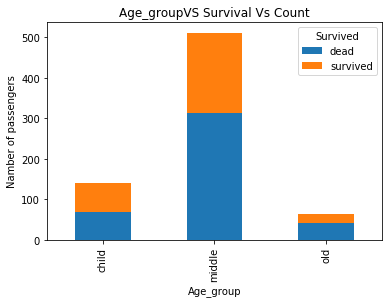

In [26]:
bar_graph('Age_group')

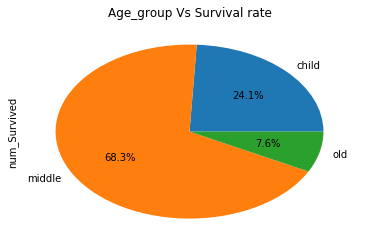

In [27]:
pie_graph('Age_group')

## 性别和客舱等级

In [28]:
def survied_information_2features(feature1,feature2):
    grouped_data = titanic_df.groupby([feature1, feature2,'Survived'])['Survived'].count().unstack().rename(index=str, columns={0: 'num_Dead', 1: 'num_Survived'})
    grouped_data['Survival rate'] = grouped_data['num_Survived']/(grouped_data['num_Dead']+ grouped_data['num_Survived'])
    return grouped_data

In [29]:
survied_information_2features('Sex', 'Pclass')

Survived       num_Dead  num_Survived  Survival rate
Sex    Pclass                                       
female 1              3            82       0.964706
       2              6            68       0.918919
       3             55            47       0.460784
male   1             61            40       0.396040
       2             84            15       0.151515
       3            215            38       0.150198

In [30]:
def bar_graph_2features(feature1,feature2):
    titanic_df.groupby([feature1, feature2,'Survived'])['Survived'].count().unstack().rename(index=str, columns={0: "dead", 1: "survived"}).plot(kind="bar", stacked=True)
    plt.ylabel('Namber of passengers')
    plt.title(feature1 + ' VS '+feature2+' VS Survival Vs Count')
    plt.show()

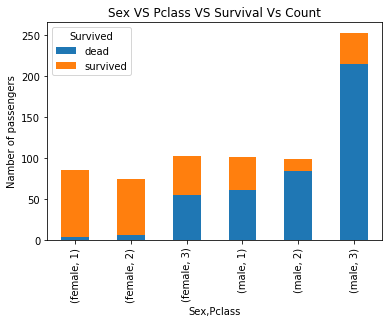

In [31]:
bar_graph_2features('Sex', 'Pclass')

## 性别和年龄

In [32]:
survied_information_2features('Sex', 'Age_group')

Survived          num_Dead  num_Survived  Survival rate
Sex    Age_group                                       
female child            22            46       0.676471
       middle           41           135       0.767045
       old               1            16       0.941176
male   child            47            24       0.338028
       middle          272            63       0.188060
       old              41             6       0.127660

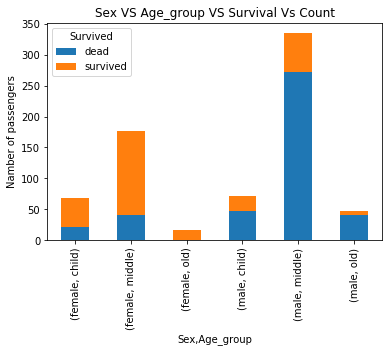

In [33]:
bar_graph_2features('Sex', 'Age_group')

## 性别，年龄，和客舱等级

In [34]:
def survied_information_3features(feature1,feature2,feature3):
    grouped_data = titanic_df.groupby([feature1, feature2,feature3,'Survived'])['Survived'].count().unstack().rename(index=str, columns={0: 'num_Dead', 1: 'num_Survived'})
    grouped_data['Survival rate'] = grouped_data['num_Survived']/(grouped_data['num_Dead']+ grouped_data['num_Survived'])
    return grouped_data

In [35]:
survied_information_3features('Sex', 'Age_group', 'Pclass')

Survived                 num_Dead  num_Survived  Survival rate
Sex    Age_group Pclass                                       
female child     1            1.0          10.0       0.909091
                 2            NaN          14.0            NaN
                 3           21.0          22.0       0.511628
       middle    1            2.0          59.0       0.967213
                 2            5.0          52.0       0.912281
                 3           34.0          24.0       0.413793
       old       1            NaN          13.0            NaN
                 2            1.0           2.0       0.666667
                 3            NaN           1.0            NaN
male   child     1            1.0           4.0       0.800000
                 2            6.0           9.0       0.600000
                 3           40.0          11.0       0.215686
       middle    1           39.0          31.0       0.442857
                 2           67.0           5.0       0.069444
                 3          166.0          27.0       0.139896
       old       1           21.0           5.0       0.192308
                 2           11.0           1.0       0.083333
                 3            9.0           NaN            NaN

In [36]:
def bar_graph_3features(feature1,feature2,feature3):
    titanic_df.groupby([feature1, feature2,feature3,'Survived'])['Survived'].count().unstack().rename(index=str, columns={0: "dead", 1: "survived"}).plot(kind="bar", stacked=True)
    plt.ylabel('Namber of passengers')
    plt.title(feature1 + ' VS '+feature2+' VS '+feature3+'VS Survival Vs Count')
    plt.show()
    

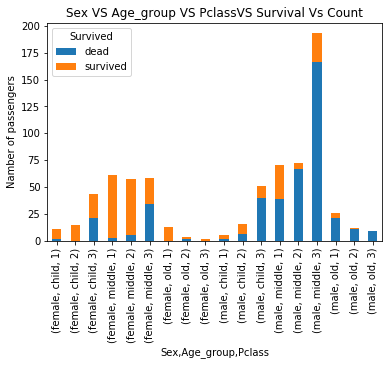

In [37]:
bar_graph_3features('Sex', 'Age_group', 'Pclass')